# Visualization for MNIST CNN
- https://adamharley.com/nn_vis/cnn/2d.html
- Alex NEt CNN: https://towardsdatascience.com/visualizing-the-fundamentals-of-convolutional-neural-networks-6021e5b07f69
- Advanced Layer Viz: https://medium.com/analytics-vidhya/visualizing-convolution-neural-network-the-hidden-truth-c825d69f1832

# 1. Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization # Dense = Fully Connected Layer
from keras.layers import Conv2D, MaxPooling2D, Flatten # Conv2D - Convolution Layer
from keras.datasets import mnist
from keras.preprocessing import image

# 2. Loading The Dataset

In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
X_train.shape

(60000, 28, 28)

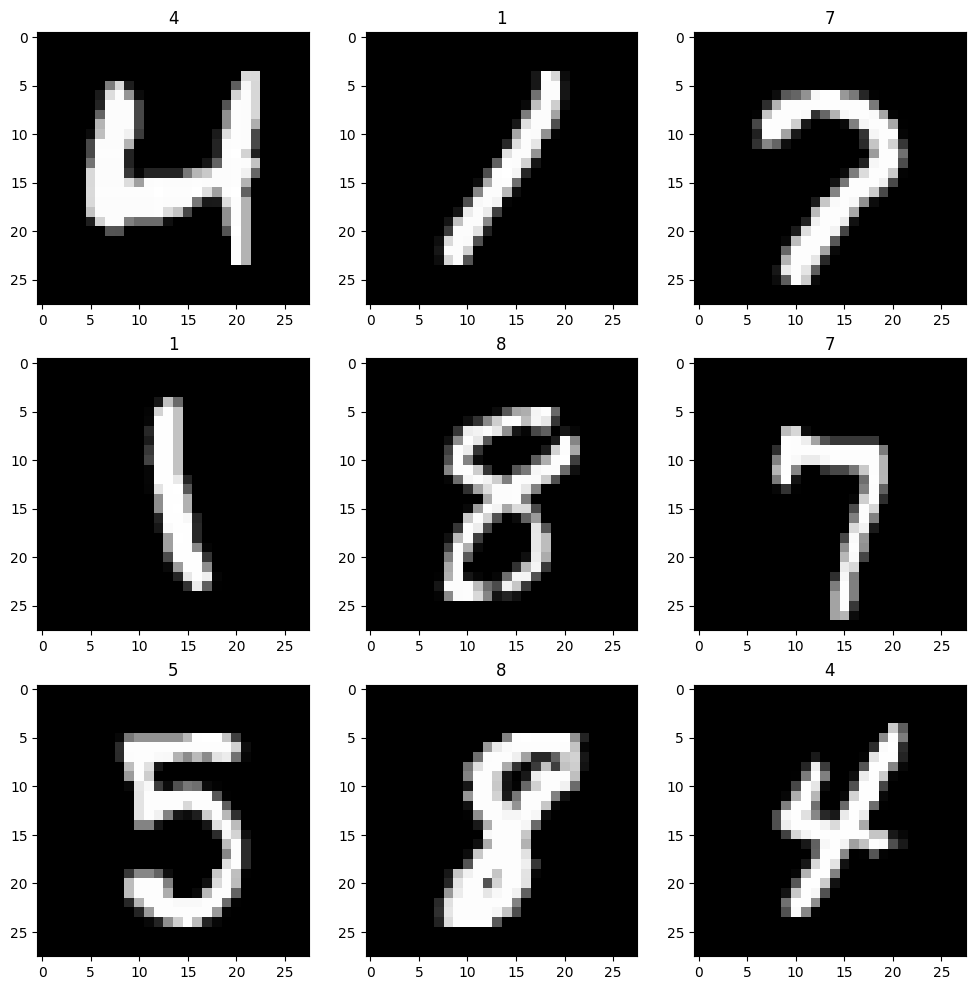

In [25]:
plt.figure(figsize=(12, 12))
np.random.seed(0)
idx = np.random.randint(0, 60000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(X_train[idx[i]], (28,28))
    plt.imshow(grid_data, cmap='gray')

# 3. Data Preprocessing

In [26]:
# Type Conversion of Columns
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization
X_train = X_train/255
X_test = X_test/255

# Adding the channel: 3x3 is same 3x3x1
# Done in order to specify that we have only 1 channel in the images
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [27]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 4. Building The Model

In [28]:
# STEP-1 Define the Model

model = None
model = Sequential()

# conv3-32 First conv layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1), activation='relu', kernel_initializer='he_normal'))
# 32 : Number of filters
# kernel_size = Filter Size
# padding: one of "valid" or "same" (case-insensitive). "valid" means no padding.
## "same" results in padding with zeros evenly to the left/right or up/down of the input.
## When padding="same" and strides=1, the output has the same size as the input.

# relu is one of the most commonly used activation for images

# input shape is only defined at starting

# conv3-64 Second Conv Layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))

# Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())

# FC-128
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# FC-10 : Final output layer 10 neurons for 10 classes
model.add(Dense(10, activation='softmax'))


# STEP-2 Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# STEP-3 Fit the Model
model.fit(X_train, Y_train, batch_size=128, epochs=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                      

In [29]:
prediction_score = model.evaluate(X_test, Y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [0.030002867802977562, 0.991599977016449]


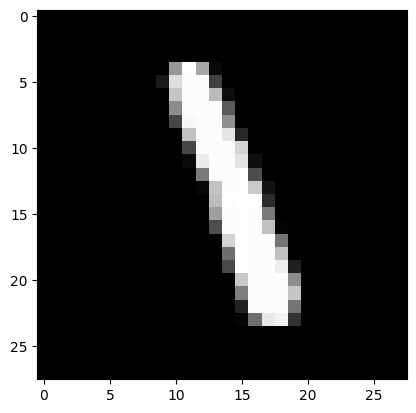

In [30]:
plt.imshow(image.array_to_img(X_test[46]), cmap="gray")

In [31]:
y_test[46]

1